In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

print("✅ All packages imported.")


✅ All packages imported.


In [17]:
# Load California housing dataset
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# Display first few rows
data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [18]:
print("Shape:", data.shape)
print("\nInfo:\n")
print(data.info())
print("\nDescribe:\n")
print(data.describe())


Shape: (20640, 9)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Describe:

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.0000

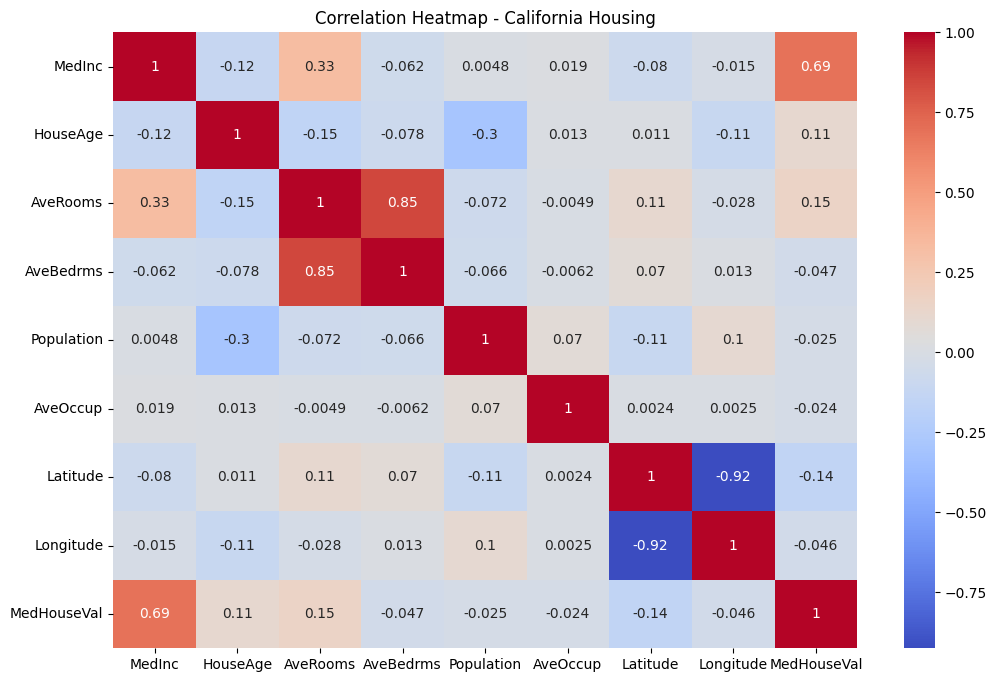

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - California Housing")
plt.show()


In [20]:
X = data.drop('MedHouseVal', axis=1)
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("✅ Linear Regression trained.")


✅ Linear Regression trained.


In [22]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("✅ Random Forest trained.")


✅ Random Forest trained.


In [23]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Linear Regression RMSE: {lr_rmse:.2f}")
print(f"Linear Regression R²: {lr_r2:.2f}")

print(f"\nRandom Forest RMSE: {rf_rmse:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")


Linear Regression RMSE: 0.75
Linear Regression R²: 0.58

Random Forest RMSE: 0.51
Random Forest R²: 0.80


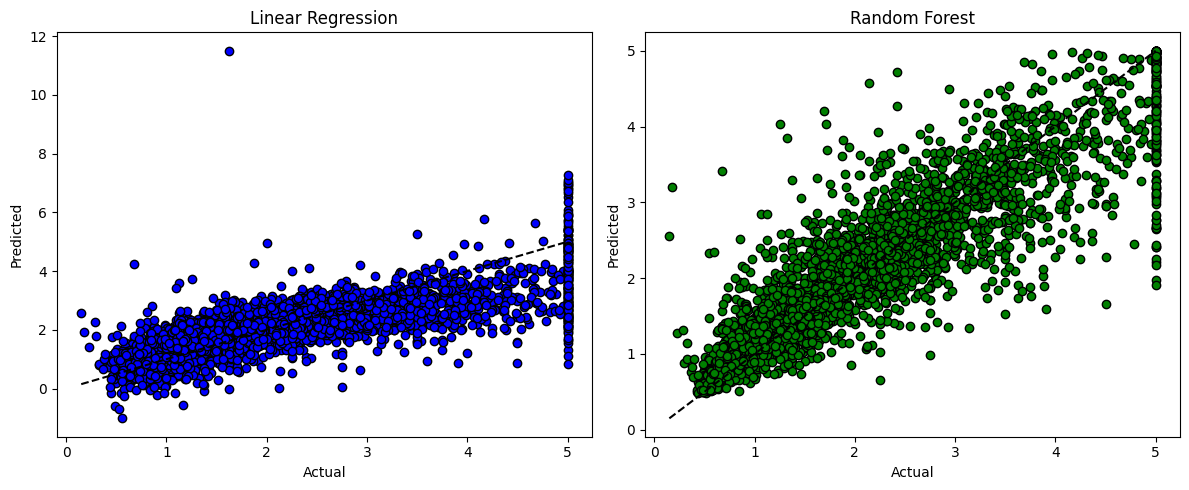

In [24]:
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")

plt.tight_layout()
plt.show()
